In [2]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 660.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 460.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 660.6 kB/s eta 0:00:16
   ---------------------------------------- 0.0/10.6 MB 495.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/10.6 MB 491.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/10.6 MB 525.1 kB/s eta 0:00:20
   ---------------------------------------- 0.1/10.6 MB 547.6 kB/s eta 0:00:20
    --------------------------------------- 0.1/10.6 MB 500.5 kB/s eta 0:00:21
    --------------------------------------- 0.2/10.6 MB 482.7 kB/s eta 

In [2]:
pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/24.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.8 MB 1.1 MB/s eta 0:00:23
   ---------------------------------------- 0.1/24.8 MB 1.1 MB/s eta 0:00:24
   ---------------------------------------- 0.1/24.8 MB 950.9 kB/s eta 0:00:26
   ---------------------------------------- 0.2/24.8 MB 952.6 kB/s eta 0:00:26
   ---------------------------------------- 0.2/24.8 MB 981.9 kB/s eta 0:00:26
   ---------------------------------------- 0.3/24.8 MB 1.0 MB/s eta 0:00:25
   ---------------------------------------- 0.3/24.8 MB 842.9 kB/s eta 0:00:30
    --------------------------------------- 0.3/24.8 MB 873.8 kB/s eta 0:00:29
    --------------------------------------- 0.4/24.8 MB 882.8 kB/s eta 0:00:28
    --------------------------------------- 0.4/24.8 MB 881.6 kB/s eta 0:00:28
    --------------------------------------- 0.5/24.8 MB 901.1 kB/s eta 0:

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import sklearn
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
import random
import shutil
import math
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.applications import Xception, ResNet50V2

In [ ]:
#ROOT_DIR='/kaggle/input/eurosat-dataset/EuroSAT'
#os.listdir(ROOT_DIR)

In [2]:
def load_images_from_directory(ROOT_DIR, normalize_rgb=False):
    images=[]
    labels=[]
    image_names=[]
    i=0
    for dir_name in os.listdir(ROOT_DIR):
        if os.path.isdir(os.path.join(ROOT_DIR,dir_name)):
            class_name = dir_name.split("\\")[-1]
            print(class_name)
            sub_dir_name = os.path.join(ROOT_DIR,dir_name)
            print(sub_dir_name)

            if os.path.isdir(sub_dir_name):    
                for img in os.listdir(sub_dir_name):
                    if img.endswith(('.jpg', '.jpeg', '.png')):                    
                        image_read = cv2.imread(os.path.join(ROOT_DIR,dir_name,img))
                        #print("{} image shape is : {}".format(img, image_read.shape))
                        img_cvt_color = cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB)
                        
                        image_names.append(img)
                        images.append(img_cvt_color)
                        labels.append(class_name)
#        i+=1
#        if i==1:
#            break
    if normalize_rgb:
        return np.array(images)/255, np.column_stack((np.array(labels), np.array(image_names)))    
    else: 
        return np.array(images), np.column_stack((np.array(labels), np.array(image_names)))

In [3]:
def split_organize_data(root_dir, train_dir, test_dir, split_ratio=0.8):
    print("train dir : ", train_dir)
    print("test dir : ", test_dir)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    for class_folder in os.listdir(root_dir):
        class_source_dir=os.path.join(root_dir, class_folder)
        if not os.path.isdir(class_source_dir):
            continue
        
        train_class_dir = os.path.join(train_dir, class_folder)
        test_class_dir = os.path.join(test_dir, class_folder)
        
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)
        
        files = os.listdir(class_source_dir)
        
        random.shuffle(files)
        
        num_train = int(len(files)*split_ratio)
        num_test = len(files) - num_train
        
        train_files = files[:num_train]
        test_files = files[num_train:]
        
        print(train_class_dir)
        for file in train_files:
            shutil.copy(os.path.join(class_source_dir, file), os.path.join(train_class_dir, file))
        print(test_class_dir)
        for file in test_files:
            shutil.copy(os.path.join(class_source_dir, file), os.path.join(test_class_dir, file))
        

In [4]:
root_dir='C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\MachineLearning\\CapstoneProject_Satellite_Image_Classification\\EuroSAT_RGB\\EuroSAT_RGB'
train_dir='C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\MachineLearning\\CapstoneProject_Satellite_Image_Classification\\EuroSAT_RGB\\train'
test_dir='C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\MachineLearning\\CapstoneProject_Satellite_Image_Classification\\EuroSAT_RGB\\test'
#root_dir="/kaggle/input/eurosat-dataset/EuroSAT"
#train_dir="/kaggle/working/eurosat-dataset/train"
#test_dir="/kaggle/working/eurosat-dataset/test"

In [38]:
split_organize_data(root_dir, train_dir, test_dir, 0.8)

train dir :  C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train
test dir :  C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\test
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train\AnnualCrop
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\test\AnnualCrop
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train\Forest
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\test\Forest
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train\HerbaceousVegetation
C:\Users\Ab

In [8]:
# #Using Functional API, building RESNET-34

# #Need to make atleast 2 mehtods , one for final architecture, and one for residual unit
# def residual_block(inputs, filters , strides):
    
#     shortcut=inputs
#     print(shortcut.shape)
#     if strides!=1 or shortcut.shape[-1] != filters[-1]:
#         shortcut = tf.keras.layers.Conv2D(filters[0], 1, strides=strides, padding='same')(shortcut)
#         shortcut = tf.keras.layers.BatchNormalization()(shortcut)
    
#     #First block 
#     x=tf.keras.layers.Conv2D(filters=filters[0],kernel_size=3,strides=strides, padding="same")(inputs)
#     x=tf.keras.layers.BatchNormalization()(x)
#     x=tf.keras.layers.Activation("relu")(x)
    
#     #Second Block
#     x=tf.keras.layers.Conv2D(filters=filters[0],kernel_size=3,strides=(1,1), padding="same")(x)
#     x=tf.keras.layers.BatchNormalization()(x)
    
#     #Third Block Skip Layer
#     x=tf.keras.layers.Add()([shortcut, x])
#     x=tf.keras.layers.Activation("relu")(x)
    
#     return x
    
# def stage(x, filters, block, strides):
#     for i in range(block):
#         if i == 0 :
#             x=residual_block(x, filters, strides)
#         else:
#             x=residual_block(x, filters, strides=1)
#     return x

# def build_resnet_34(input_shape=(64,64,3), num_classes=10 ):
#     inputs = tf.keras.layers.Input(shape=input_shape)
    
#     #Starting convolutional layers of kernel 7*7 and stride 2
#     x=tf.keras.layers.Conv2D(64, kernel_size=7, padding="same", strides=2, activation="relu")(inputs)
#     x=tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding="same")(x)
    
#     #Residual Blocks
#     x=stage(x,filters=[64],block=3, strides=1 )
#     x=stage(x,filters=[128],block=4, strides=2 )
#     x=stage(x,filters=[256],block=6, strides=2 )
#     x=stage(x,filters=[512],block=3, strides=1 )
    
#     #Final Output Layers
#     x=tf.keras.layers.GlobalAveragePooling2D()(x)
#     x=tf.keras.layers.Dense(512, activation="relu", kernel_initializer="he_normal")(x)
#     outputs= tf.keras.layers.Dense(num_classes, activation="softmax")(x)
#     model = tf.keras.Model(inputs, outputs)
#     return model


In [9]:
# model = build_resnet_34(input_shape=(64,64,3), num_classes=10) 

(None, 16, 16, 64)
(None, 16, 16, 64)
(None, 16, 16, 64)
(None, 16, 16, 64)
(None, 8, 8, 128)
(None, 8, 8, 128)
(None, 8, 8, 128)
(None, 8, 8, 128)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 512)
(None, 4, 4, 512)


In [5]:
#Making Resnet34 using class ResidualUnit to check the performance 
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.filters=filters
        self.strides=strides
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides,
                               padding="same", use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1,
                               padding="same", use_bias=False),
            keras.layers.BatchNormalization()
        ]
        self.skip_layers=[]
        if strides > 1 :
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides,
                                   padding="same", use_bias=False),
                keras.layers.BatchNormalization()
            ]
        
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z=layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z+skip_Z)
    
    def get_config(self):
        config = super().get_config()
        config.update({
            'filters': self.filters,
            'strides': self.strides,
            'activation': keras.activations.serialize(self.activation)
        })
        return config

In [6]:
# ##Resnet Model using Sequential API Keras

# model = keras.models.Sequential()
# model.add(keras.layers.Conv2D(64, 7, strides=2, 
#                               input_shape=[64,64,3],
#                              padding="same", use_bias=False))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Activation("relu"))
# model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="Same"))
# prev_filters=64
# for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
#     strides=1 if filters==prev_filters else 2
#     model.add(ResidualUnit(filters, strides=strides))
#     prev_filters = filters
# model.add(keras.layers.GlobalAvgPool2D())
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(64,64,3))

base_model.trainable = False

inputs = keras.Input(shape=(64, 64, 3))

x = base_model(inputs, training=False)

# Add custom classification head
#x = base_model.output
x = tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding="same", data_format="channels_last")(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x) 
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs, outputs)


In [11]:
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam

In [12]:
model.compile(optimizer=Nadam(learning_rate=0.0005,clipnorm=1.0), loss='sparse_categorical_crossentropy' , metrics=['accuracy'] )

In [13]:
model.summary(show_trainable=True)

Model: "model"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         Y          
                                                                            
 resnet50v2 (Functional)     (None, 2, 2, 2048)        23564800  N          
                                                                            
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         2359424   Y          
                                                                            
 global_average_pooling2d_2   (None, 128)              0         Y          
 (GlobalAveragePooling2D)                                                   
                                                                            
 dense_1 (Dense)             (None, 512)               66048     Y          
                                                             

In [14]:
#### Setup Image Data Generator with augmentation

augment_data_generator=ImageDataGenerator(rotation_range=180, 
                                          width_shift_range=0.2, 
                                          height_shift_range=0.2, 
                                          rescale=1./255, 
                                          shear_range=0.3, 
                                          zoom_range=0.3, 
                                          horizontal_flip=True, 
                                          vertical_flip=True,
                                          validation_split=0.2,
                                          brightness_range=(0.7,0.9),
                                         data_format="channels_last")

#data_dir = '/kaggle/working/eurosat-dataset/train'

train_data_generator = augment_data_generator.flow_from_directory(
    train_dir, 
    target_size=(64,64),
    color_mode='rgb',
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_data_generator = augment_data_generator.flow_from_directory(
    train_dir, 
    target_size=(64,64),
    color_mode='rgb',
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 17280 images belonging to 10 classes.
Found 4320 images belonging to 10 classes.


In [17]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("resnet50v2_out_conv_transfer_learning.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)

In [18]:
history=model.fit(train_data_generator, 
                  epochs=50, 
                  validation_data=validation_data_generator,
                 callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
540/540 [==============================] - 35s 64ms/step - loss: 0.6731 - accuracy: 0.7755 - val_loss: 0.6076 - val_accuracy: 0.7933
Epoch 2/50
540/540 [==============================] - 35s 64ms/step - loss: 0.6308 - accuracy: 0.7887 - val_loss: 0.5967 - val_accuracy: 0.7984
Epoch 3/50
540/540 [==============================] - 34s 64ms/step - loss: 0.5932 - accuracy: 0.7990 - val_loss: 0.5790 - val_accuracy: 0.7965
Epoch 4/50
540/540 [==============================] - 35s 64ms/step - loss: 0.5727 - accuracy: 0.8056 - val_loss: 0.5680 - val_accuracy: 0.8111
Epoch 5/50
540/540 [==============================] - 36s 66ms/step - loss: 0.5712 - accuracy: 0.8070 - val_loss: 0.5819 - val_accuracy: 0.8065
Epoch 6/50
540/540 [==============================] - 34s 63ms/step - loss: 0.5531 - accuracy: 0.8173 - val_loss: 0.5683 - val_accuracy: 0.8079
Epoch 7/50
540/540 [==============================] - 34s 64ms/step - loss: 0.5509 - accuracy: 0.8179 - val_loss: 0.5157 - val_accuracy:

In [19]:
base_model.trainable = True
model.summary(show_trainable=True)

Model: "model"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         Y          
                                                                            
 resnet50v2 (Functional)     (None, 2, 2, 2048)        23564800  Y          
                                                                            
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         2359424   Y          
                                                                            
 global_average_pooling2d_2   (None, 128)              0         Y          
 (GlobalAveragePooling2D)                                                   
                                                                            
 dense_1 (Dense)             (None, 512)               66048     Y          
                                                             

In [20]:
model.compile(optimizer=Nadam(learning_rate=0.000001,clipnorm=1.0), loss='sparse_categorical_crossentropy' , metrics=['accuracy'] )

In [21]:
checkpoint_cb1 = keras.callbacks.ModelCheckpoint("resnet50v2_out_conv_transfer_learning.h5", save_best_only=True)
early_stopping_cb1 = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history=model.fit(train_data_generator, 
                  epochs=50, 
                  validation_data=validation_data_generator,
                 callbacks=[checkpoint_cb1, early_stopping_cb1])

Epoch 1/50
540/540 [==============================] - 95s 148ms/step - loss: 0.4459 - accuracy: 0.8499 - val_loss: 0.4306 - val_accuracy: 0.8567
Epoch 2/50
540/540 [==============================] - 79s 147ms/step - loss: 0.4066 - accuracy: 0.8601 - val_loss: 0.4021 - val_accuracy: 0.8644
Epoch 3/50
540/540 [==============================] - 79s 147ms/step - loss: 0.3919 - accuracy: 0.8684 - val_loss: 0.3872 - val_accuracy: 0.8734
Epoch 4/50
540/540 [==============================] - 78s 144ms/step - loss: 0.3761 - accuracy: 0.8742 - val_loss: 0.4147 - val_accuracy: 0.8687
Epoch 5/50
540/540 [==============================] - 79s 146ms/step - loss: 0.3635 - accuracy: 0.8750 - val_loss: 0.3759 - val_accuracy: 0.8782
Epoch 6/50
540/540 [==============================] - 79s 146ms/step - loss: 0.3501 - accuracy: 0.8815 - val_loss: 0.3458 - val_accuracy: 0.8789
Epoch 7/50
540/540 [==============================] - 78s 145ms/step - loss: 0.3380 - accuracy: 0.8888 - val_loss: 0.3825 - val_ac

In [22]:
def create_graph_for_nn_training(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

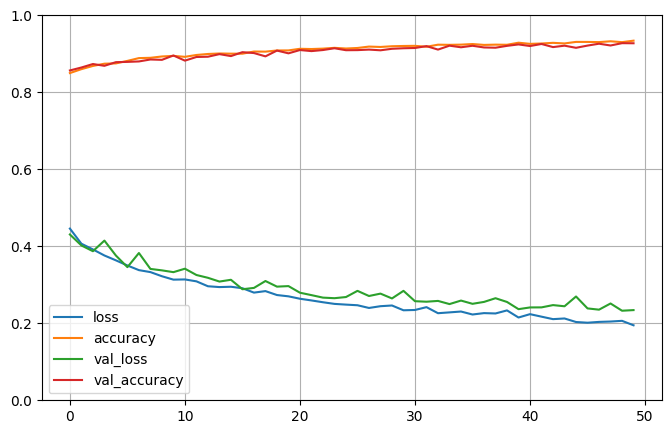

In [23]:
create_graph_for_nn_training(history)

In [64]:
model.evaluate()

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>

In [24]:
#test_dir='/kaggle/working/eurosat-dataset/test'
test_data_generator = augment_data_generator.flow_from_directory(
    test_dir, 
    target_size=(64,64),
    color_mode='rgb',
    batch_size=32,
    class_mode='sparse',
    interpolation="lanczos",
    shuffle=False
)

Found 5400 images belonging to 10 classes.


In [26]:
batch_size=32
test_data_generator.reset() 
y_pred = model.predict(test_data_generator)#,steps= math.ceil(test_data_generator.samples//batch_size),workers=8)

y_pred.shape

(5400, 10)

In [27]:
predicted_labels = np.argmax(y_pred, axis=1)

# Compare with ground truth labels
true_labels = test_data_generator.classes

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9281481481481482


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

def precision_recall_f1_value(actual_value, predicted_value, classes, average_type='binary'):
    precision_value = precision_score(actual_value, predicted_value, average=average_type)
    recall_value = recall_score(actual_value, predicted_value, average=average_type)
    f1 = f1_score(actual_value, predicted_value, average=average_type)
    conf_matrix = confusion_matrix(actual_value, predicted_value)
    print("Precision Value : " + str(precision_value))
    print("Recall value : " + str(recall_value))
    print("F1 Score : " + str(f1))
    print("Following is the confusion matrx for this model : ")
    print(conf_matrix)
    plt.matshow(conf_matrix, cmap=plt.cm.gray)
    
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes=classes
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes, rotation=0)
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

Precision Value : 0.9279881058946984
Recall value : 0.9251833333333332
F1 Score : 0.9261987858543286
Following is the confusion matrx for this model : 
[[561   2   1   4   0   7  11   0   8   6]
 [  0 589   6   0   0   3   0   1   1   0]
 [  2   8 547   5   2   9  19   7   1   0]
 [ 17   3  16 420   4   6   7   2  24   1]
 [  0   0   2   3 475   0   6  13   1   0]
 [  9   8   9   1   0 367   3   0   2   1]
 [ 23   0  45   2   2   2 424   2   0   0]
 [  0   1   7   0   6   0   1 583   2   0]
 [ 10   1   1  21   2   1   1   0 459   4]
 [  1   2   3   1   0   4   0   0   2 587]]


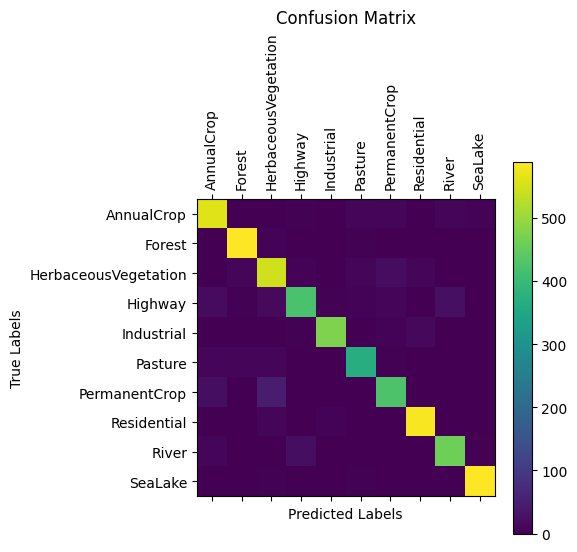

In [29]:
precision_recall_f1_value(true_labels, predicted_labels, ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "PermanentCrop", "Residential", "River", "SeaLake"],"macro")